In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #ignoramos las advertencias futuras
#Nota: se genera una advertencia debido a un problema de compatibilidad de KNN con otras versiones

iris = datasets.load_iris() #cargamos el dataset

#convertimos el dataset a un Dataframe de pandas
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target']) 

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [2]:
#Separamos entre los valores y la clase del dataframe
X = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].values
Y = df['target'].values

#con ayuda de la funcion "train_test_split", dividiremos el dataset de iris de forma aleatoria,
#otorgando un 80% del dataset para entrenamiento y un 20% para pruebas
Xtr, Xts, Ytr, Yts = train_test_split(X, Y, random_state=0)

#definimos un escalador, esto nos ayuda para realizar KNN, lo cual nos convierte los valores en una escala entre o y 1
scaler = MinMaxScaler()

#convertimos nuestros datos en funcion del escalador
Xtr = scaler.fit_transform(Xtr)
Xts = scaler.transform(Xts)

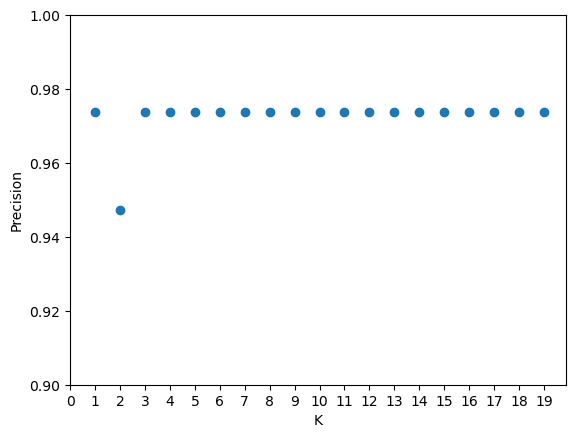

In [5]:
#para realizar el algoritmo de KNN, deberemos determinar un valor de K en el cual podamos obtener la mejor precision
#asi que revisaremos los primeros 20 valores de k, para ver cual es el optimo
Ks = range(1, 20)
Precision = []
for K in Ks:
    KNN = KNeighborsClassifier(n_neighbors = K)
    KNN.fit(Xtr, Ytr)
    Precision.append(KNN.score(Xts, Yts))
plt.figure()
plt.xlabel('K')
plt.ylabel('Precision')
plt.scatter(Ks, Precision)
plt.xticks(list(range(20)))
plt.yticks([0.90,0.92,0.94,0.96,0.98,1])
plt.show()

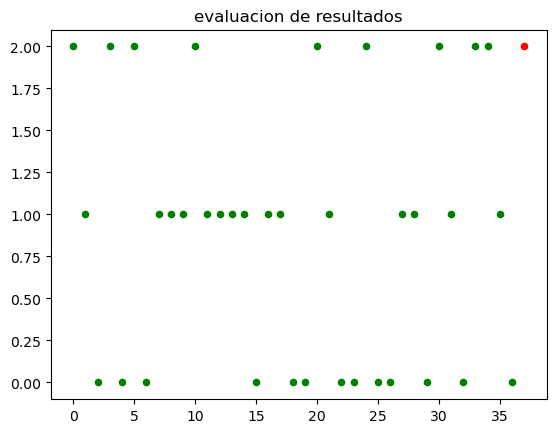

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0. 2. 1. 0. 2. 2. 1. 0. 1.]
[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0. 2. 1. 0. 2. 2. 1. 0. 2.]


In [6]:
#La grafica anterior nos muestra una comparativa entre los valores de K y la precision
#bajo esto utilizaremos un valor de K=3 para realizar los calculos
K = 3
 
KNN = KNeighborsClassifier(K)
KNN.fit(Xtr, Ytr)

#Ahora que tenemos cargado nuestro predictor, lo probaremos con los datos de prueba
Py = KNN.predict(Xts)

fig = plt.figure()
#Crearemos un grafico con las clases obtenidas, en donde si el resultado coincide con lo esperado
#se pintara de verde, caso contrario lo pintara de rojo.
for i in range(len(Yts)):
    if(Yts[i]==Py[i]):
        plt.scatter(i, Py[i], c="green",s=20)
    else:
        plt.scatter(i, Py[i], c="red",s=20)   
plt.title("evaluacion de resultados")
plt.show()

print(Yts)
print(Py)

In [8]:
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
#Podemos observar que falla 1 de cada 20 iteraciones, para finalizar calcularemos la similaridad del coseno
#para medir la eficiencia del algoritmo
result = cosine_similarity(np.array([KNN.predict(Xts)]).reshape(1,-1),np.array([Yts]).reshape(1,-1))

print("Similaridad del coseno =",result[0][0])

Similaridad del coseno = 0.9910438094089646
